In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Document Weighting

## TF-IDF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#df = pd.read_csv('dataku.csv')
df = pd.read_csv('/content/drive/MyDrive/MTI/NLP/Kelompok/dataku.csv')

In [ ]:
df = df.dropna()

In [ ]:
text = df['Tweet'].values.tolist()
label = df['HS'].values

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_text = tfidf_vectorizer.fit_transform(text)

feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_text[0].toarray()[0]

result = pd.DataFrame({'TF-IDF': tfidf_scores}, index=feature_names)
result = result.sort_values('TF-IDF', ascending=False)
result.head(10)


,TF-IDF
perhati,0.478823
cowok,0.448759
basic,0.335414
lacak,0.317153
remeh,0.300352
lantas,0.288968
beru,0.250795
bego,0.203845
khusus,0.195096
at,0.148543


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the text data
tfidf_text = tfidf_vectorizer.fit_transform(text)

# calculate the sum of TF-IDF scores across all documents
total_tfidf = tfidf_text.sum()

print("Total TF-IDF score across all documents:", total_tfidf)

Total TF-IDF score across all documents: 38138.07958115842


## Document Term Matrix

In [ ]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['Tweet'])

In [ ]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
print(dtm_df.head(10))

   00  000  00n  00wib  01  02  021  03  031  04  ...  zu  zuhair  zuhud  zul  \
0   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
1   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
2   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
3   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
4   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
5   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
6   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
7   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
8   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   
9   0    0    0      0   0   0    0   0    0   0  ...   0       0      0    0   

   zulkarnain  zulkifli  zumi  zumiiiii  zzzzzz  zzzzzzzz  
0           0         0     0         0       0 

In [ ]:
#dtm_df.to_csv('dtm_data.csv')

In [ ]:
#from google.colab import files
#files.download("dtm_data.csv")

### Analisis Frekuensi

In [ ]:
import matplotlib.pyplot as plt

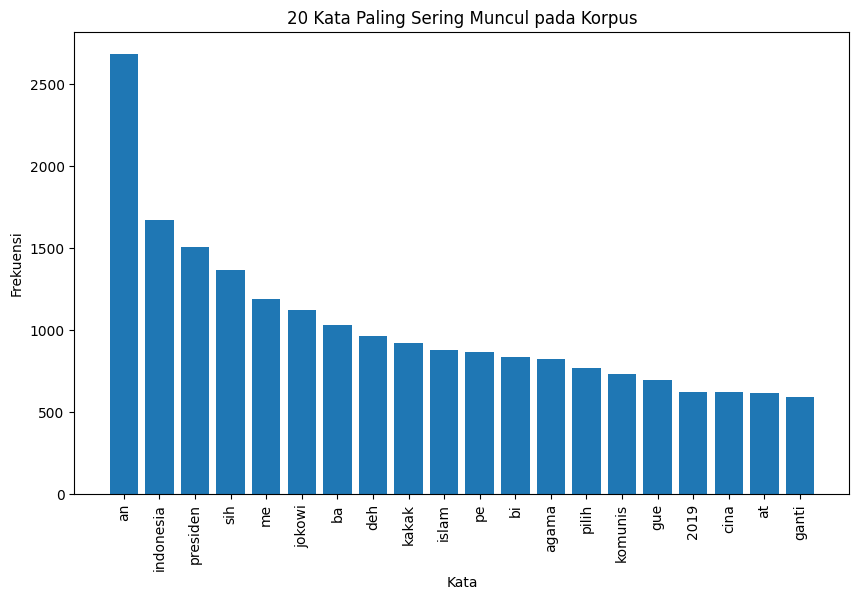

In [ ]:
# Menghitung frekuensi kemunculan kata
freq = dtm_df.sum(axis=0).sort_values(ascending=False)

# Membuat visualisasi grafik frekuensi kata
plt.figure(figsize=(10,6))
plt.bar(freq.index[:20], freq.values[:20])
plt.xticks(rotation=90)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('20 Kata Paling Sering Muncul pada Korpus')
plt.show()

### Analisis Korelasi Antar Kata

In [ ]:
from scipy.stats import pearsonr

In [ ]:
# Membuat dataframe dari DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Menghitung korelasi antara dua kata
word1 = 'indonesia'
word2 = 'presiden'
corr, _ = pearsonr(dtm_df[word1], dtm_df[word2])
print('Korelasi antara kata "{}" dan "{}": {:.2f}'.format(word1, word2, corr))

Korelasi antara kata "indonesia" dan "presiden": 0.07


In [ ]:
# Menghitung korelasi antara dua kata
word1 = 'jokowi'
word2 = 'presiden'
corr, _ = pearsonr(dtm_df[word1], dtm_df[word2])
print('Korelasi antara kata "{}" dan "{}": {:.2f}'.format(word1, word2, corr))

Korelasi antara kata "jokowi" dan "presiden": 0.18


# Implementasi Model


## Persiapan Data

In [ ]:
MODEL = []
TEST = []

def eval(model,test1):
    MODEL.append(model)
    TEST.append(round(test1,2))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

## 1.Metode SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
modelSVC = SVC().fit(X_train,y_train)

In [ ]:
pred_svm = modelSVC.predict(X_test)
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2486
           1       0.74      0.85      0.79      1449

    accuracy                           0.83      3935
   macro avg       0.82      0.84      0.82      3935
weighted avg       0.84      0.83      0.83      3935



In [ ]:
y_test_pred_svc = modelSVC.predict(X_test)
y_train_pred_svc = modelSVC.predict(X_train)

Svc_ACC =accuracy_score(y_test_pred_svc,y_test)*100
eval("Support Vector Machine",Svc_ACC)

#### Simpan ke Joblib

In [ ]:
import joblib
joblib.dump(modelSVC, '/content/drive/MyDrive/MTI/NLP/NLP_SVM.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_SVM.pkl']

In [ ]:
#joblib_model = joblib.load('/content/drive/MyDrive/MTI/NLP/svm.pkl')
#DIGUNAKAN UNTUK ME LOAD MODEL

## 2.Metode KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNNModel = KNN.fit(X_train,y_train)

In [ ]:
pred_KNN = KNN.predict(X_test)
print(classification_report(pred_KNN, y_test))

              precision    recall  f1-score   support

           0       0.15      0.86      0.25       384
           1       0.97      0.45      0.62      3551

    accuracy                           0.49      3935
   macro avg       0.56      0.66      0.43      3935
weighted avg       0.89      0.49      0.58      3935



In [ ]:
y_test_pred_knn = KNNModel.predict(X_test)
y_train_pred_knn = KNNModel.predict(X_train)

KNN_ACC =accuracy_score(y_test_pred_knn,y_test)*100
eval("K-Nearest Neighbour",KNN_ACC)

In [ ]:
import joblib
joblib.dump(KNNModel, '/content/drive/MyDrive/MTI/NLP/NLP_KNN.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_KNN.pkl']

## 3.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

# Create a Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2268
           1       0.81      0.78      0.79      1667

    accuracy                           0.83      3935
   macro avg       0.83      0.82      0.82      3935
weighted avg       0.83      0.83      0.83      3935



In [ ]:
y_test_pred_clf = clf.predict(X_test)
y_train_pred_clf = clf.predict(X_train)

CLF_ACC =accuracy_score(y_test_pred_clf,y_test)*100
eval("Random Forest",CLF_ACC)

In [ ]:
import joblib
joblib.dump(clf, '/content/drive/MyDrive/MTI/NLP/NLP_RandomForest.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_RandomForest.pkl']

## 4.Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2268
           1       0.82      0.72      0.77      1667

    accuracy                           0.82      3935
   macro avg       0.82      0.80      0.81      3935
weighted avg       0.82      0.82      0.81      3935



In [ ]:
y_test_pred_nb = nb.predict(X_test)
y_train_pred_nb = nb.predict(X_train)

NB_ACC =accuracy_score(y_test_pred_nb,y_test)*100
eval("Naive Bayes",NB_ACC)

In [ ]:
import joblib
joblib.dump(nb, '/content/drive/MyDrive/MTI/NLP/NLP_NB.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_NB.pkl']

## 5.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

# Train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2268
           1       0.71      0.77      0.74      1667

    accuracy                           0.77      3935
   macro avg       0.77      0.77      0.77      3935
weighted avg       0.78      0.77      0.77      3935



In [ ]:
y_test_pred_dt = dt.predict(X_test)
y_train_pred_dt = dt.predict(X_train)

DT_ACC =accuracy_score(y_test_pred_dt,y_test)*100
eval("Decission Tree",DT_ACC)

In [ ]:
import joblib
joblib.dump(dt, '/content/drive/MyDrive/MTI/NLP/NLP_DecissionTree.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_DecissionTree.pkl']

## 6.Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)


# Train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2268
           1       0.71      0.77      0.74      1667

    accuracy                           0.77      3935
   macro avg       0.77      0.77      0.77      3935
weighted avg       0.78      0.77      0.77      3935



In [ ]:
y_test_pred_gb = gb.predict(X_test)
y_train_pred_gb = gb.predict(X_train)

GB_ACC =accuracy_score(y_test_pred_gb,y_test)*100
eval("Gradient Boost",GB_ACC)

In [ ]:
import joblib
joblib.dump(gb, '/content/drive/MyDrive/MTI/NLP/NLP_GB.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_GB.pkl']

## 7.ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=1)
clf_A = AdaBoostClassifier(base_estimator=dt, n_estimators=500)

clf_A.fit(X_train, y_train)
y_pred = clf_A.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2268
           1       0.78      0.75      0.76      1667

    accuracy                           0.80      3935
   macro avg       0.80      0.80      0.80      3935
weighted avg       0.80      0.80      0.80      3935



In [ ]:
y_test_pred_ab = clf_A.predict(X_test)
y_train_pred_ab = clf_A.predict(X_train)

GB_AB =accuracy_score(y_test_pred_ab,y_test)*100
eval("Gradient Boost",GB_AB)

In [ ]:
import joblib
joblib.dump(clf_A, '/content/drive/MyDrive/MTI/NLP/NLP_ADAB.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_ADAB.pkl']

### 8.XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# train XGBoost classifier
xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      2268
           1       0.86      0.63      0.73      1667

    accuracy                           0.80      3935
   macro avg       0.82      0.78      0.78      3935
weighted avg       0.81      0.80      0.79      3935



In [ ]:
# evaluate model
accuracyXGB = xgb.score(X_test, y_test)
print(f'Test accuracy: {accuracyXGB}')

Test accuracy: 0.7994917407878018


In [ ]:
y_test_pred_xgb = xgb.predict(X_test)
y_train_pred_xgb = xgb.predict(X_train)

ACC_XGB =accuracy_score(y_test_pred_xgb,y_test)*100
eval("XGBoost",ACC_XGB)

In [ ]:
import joblib
joblib.dump(xgb, '/content/drive/MyDrive/MTI/NLP/NLP_XGB.pkl')

['/content/drive/MyDrive/MTI/NLP/NLP_XGB.pkl']

### PERBANDINGAN AKURASI MODEL ML

In [ ]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

,Model,Akurasi
0,Support Vector Machine,83.23
2,Random Forest,82.80
3,Naive Bayes,81.52
6,Gradient Boost,80.23
7,XGBoost,79.95
5,Gradient Boost,78.53
4,Decission Tree,77.15
1,K-Nearest Neighbour,49.43


## 8. Neural Network

##### simpan

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=42)
"""
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

max_len = 100

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

model = Sequential()
model.add(Dense(64, input_shape=(max_len,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


"""

'\ntokenizer = Tokenizer(num_words=5000)\ntokenizer.fit_on_texts(X_train)\n\nX_train = tokenizer.texts_to_sequences(X_train)\nX_test = tokenizer.texts_to_sequences(X_test)\n\nvocab_size = len(tokenizer.word_index) + 1\n\nmax_len = 100\n\nX_train = pad_sequences(X_train, padding=\'post\', maxlen=max_len)\nX_test = pad_sequences(X_test, padding=\'post\', maxlen=max_len)\n\nmodel = Sequential()\nmodel.add(Dense(64, input_shape=(max_len,), activation=\'relu\'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\nmodel.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n\nhistory = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))\n\nscore = model.evaluate(X_test, y_test, verbose=0)\nprint("Test loss:", score[0])\nprint("Test accuracy:", score[1])\n\n\n'

### NN

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scipy.sparse import csr_matrix
import tensorflow as tf

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label,  test_size=0.2, random_state=42)

# Create a TfidfVectorizer object
#vectorizer = TfidfVectorizer()

# Transform the training data using the vectorizer and sort the indices
X_train.sort_indices()

# Define the neural network model
modelnn = Sequential()
modelnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(1, activation='sigmoid'))

# Compile the model
modelnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = modelnn.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
287/287 [==============================] - 5s 13ms/step - loss: 0.5929 - accuracy: 0.7060
Epoch 2/10
287/287 [==============================] - 4s 13ms/step - loss: 0.3818 - accuracy: 0.8476
Epoch 3/10
287/287 [==============================] - 5s 17ms/step - loss: 0.2899 - accuracy: 0.8859
Epoch 4/10
287/287 [==============================] - 5s 18ms/step - loss: 0.2344 - accuracy: 0.9120
Epoch 5/10
287/287 [==============================] - 8s 26ms/step - loss: 0.1954 - accuracy: 0.9299
Epoch 6/10
287/287 [==============================] - 8s 26ms/step - loss: 0.1652 - accuracy: 0.9413
Epoch 7/10
287/287 [==============================] - 5s 17ms/step - loss: 0.1435 - accuracy: 0.9515
Epoch 8/10
287/287 [==============================] - 4s 14ms/step - loss: 0.1245 - accuracy: 0.9572
Epoch 9/10
287/287 [==============================] - 5s 16ms/step - loss: 0.1088 - accuracy: 0.9632
Epoch 10/10
287/287 [==============================] - 5s 16ms/step - loss: 0.0979 - accura

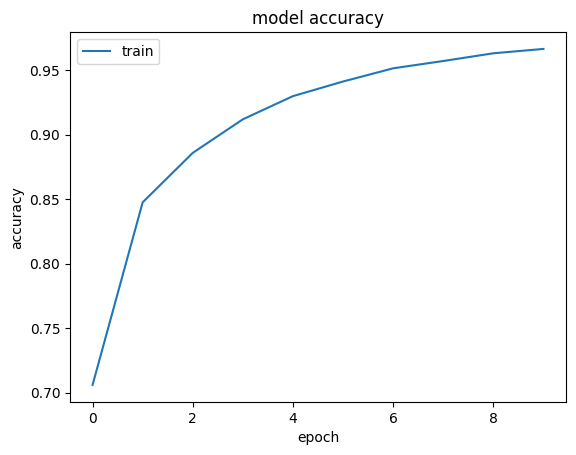

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
final_NN_acc = history.history['accuracy'][-1]*100

print('Final accuracy:', final_NN_acc)

Final accuracy: 96.65541052818298


In [ ]:
eval("Neural-Network",final_NN_acc)

In [ ]:
import joblib

# save model to joblib file
joblib.dump(modelnn, '/content/drive/MyDrive/MTI/NN.joblib')

['/content/drive/MyDrive/MTI/NN.joblib']

In [ ]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

,Model,Akurasi
10,Neural-Network,96.66
0,Support Vector Machine,83.23
2,Random Forest,82.80
3,Naive Bayes,81.52
6,Gradient Boost,80.23
7,XGBoost,79.95
5,Gradient Boost,78.53
4,Decission Tree,77.15
1,K-Nearest Neighbour,49.43
9,Neural-Network,0.97


# arsip

## [ARSIP] CNN [ARSIP] TERLALU LAMA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding

In [ ]:
# define CNN architecture
model = Sequential()
model.add(Embedding(input_dim=tfidf_text.shape[1], output_dim=128, input_length=X_train.shape[1]))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
 53/144 [==========>...................] - ETA: 16:53 - loss: 0.9254 - accuracy: 0.5660

KeyboardInterrupt: ignored

In [ ]:
# evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy}')

In [ ]:
final_CNN_acc = accuracy

In [ ]:
eval("Convulution Neural-Network",final_CNN_acc)

In [ ]:
import joblib

# save model to joblib file
joblib.dump(model, 'lstm_model.joblib')


### [ARSIP] LSTM KELAMAN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [ ]:
# define LSTM architecture
model = Sequential()
model.add(Embedding(input_dim=tfidf_text.shape[1], output_dim=128, input_length=X_train.shape[1]))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


Epoch 1/5


In [ ]:
# evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy}')

In [ ]:
import joblib

# save model to joblib file
joblib.dump(model, 'lstm_model.joblib')


### Perbandingan Semua Metode

In [ ]:
results2 = pd.DataFrame({ 'Model': MODEL,
                         'Akurasi': TEST})

results2.sort_values(by='Akurasi',ascending=False)

## COSINE

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Compute the TF-IDF vectors for the dataset
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tweet'])

# Calculate the cosine similarity matrix between the TF-IDF vectors
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Print the cosine similarity matrix
print(cosine_sim_matrix)

[[1.         0.         0.01585464 ... 0.         0.         0.05659841]
 [0.         1.         0.         ... 0.         0.         0.021161  ]
 [0.01585464 0.         1.         ... 0.         0.04515585 0.094554  ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.04515585 ... 0.         1.         0.        ]
 [0.05659841 0.021161   0.094554   ... 0.         0.         1.        ]]
